# Processing Images

## Contour Detection

### Image Thresholding

If pixel value is greater than a threshold value, it is assigned one value else it is assigned another value

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

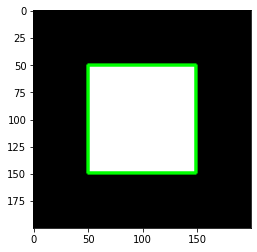

In [60]:
img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255 # change the square in the center to white

ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img = cv2.drawContours(color, contours, -1, (0, 255, 0), 2)

plt.imshow(img)

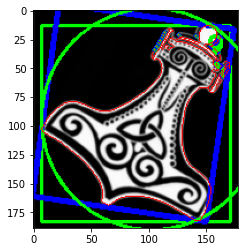

In [61]:
hammerImg = cv2.imread("hammer.png")

# Blur and downsanple an image
hammerImg = cv2.pyrDown(hammerImg, cv2.IMREAD_UNCHANGED)

ret, thresh = cv2.threshold(src=cv2.cvtColor(hammerImg, cv2.COLOR_BGR2GRAY), thresh=127, maxval=255, type=cv2.THRESH_BINARY)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    #find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    # Draw the bounding rectangle
    cv2.rectangle(hammerImg, (x,y), (x+w, y+h), (0, 255, 0), thickness=2)

    #find bounding rect with minimum area
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(box=rect)
    box = np.int0(box)
    # draw minimum bounding box, contourIdx: draw contour at this index
    cv2.drawContours(image=hammerImg, contours=[box], contourIdx=0, color=(0, 0, 255), thickness=3)

    # find minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    center = (int(x), int(y))
    radius = int(radius)
    hammerImg = cv2.circle(hammerImg, center, radius, color=(0, 255, 0), thickness=2)

cv2.drawContours(hammerImg, contours, -1, (255, 0, 0), 1)
plt.imshow(hammerImg)

### Convex contours and the Douglas-Peucker algorithm

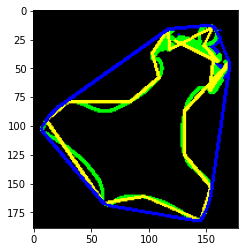

In [62]:
himg = cv2.pyrDown(cv2.imread("hammer.png"), cv2.IMREAD_UNCHANGED)
ret, thresh = cv2.threshold(cv2.cvtColor(himg, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(himg)
for cnt in contours:
    # maximum difference between the approximated polygon's perimeter and the original contour's perimeter
    epsilon = 0.01 * cv2.arcLength(curve=cnt, closed=True)
    # concave bounding polygon
    approx = cv2.approxPolyDP(curve=cnt, epsilon=epsilon, closed=True)
    # convex bounding polygon
    hull = cv2.convexHull(cnt)
    cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
    cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)

plt.imshow(black)

In [63]:
cv2.approxPolyDP?

Docstring:
approxPolyDP(curve, epsilon, closed[, approxCurve]) -> approxCurve
.   @brief Approximates a polygonal curve(s) with the specified precision.
.   
.   The function cv::approxPolyDP approximates a curve or a polygon with another curve/polygon with less
.   vertices so that the distance between them is less or equal to the specified precision. It uses the
.   Douglas-Peucker algorithm <http://en.wikipedia.org/wiki/Ramer-Douglas-Peucker_algorithm>
.   
.   @param curve Input vector of a 2D point stored in std::vector or Mat
.   @param approxCurve Result of the approximation. The type should match the type of the input curve.
.   @param epsilon Parameter specifying the approximation accuracy. This is the maximum distance
.   between the original curve and its approximation.
.   @param closed If true, the approximated curve is closed (its first and last vertices are
.   connected). Otherwise, it is not closed.
Type:      builtin_function_or_method


## Detecting lines, circles and other shapes

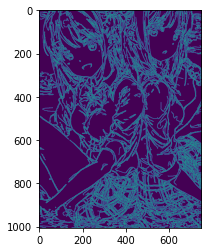

In [70]:
img = cv2.imread('a.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=50, threshold2=120)

# Lines shorter than minLineLength will be discarded
minLineLength = 20
maxLineGap = 5
# TODO: https://en.wikipedia.org/wiki/Hough_transform
lines = cv2.HoughLinesP(image=edges, rho=1, theta=np.pi/180.0, threshold=20, minLineLength=minLineLength, maxLineGap=maxLineGap)

# Draw the first lines to the original image
for x1, y1, x2, y2 in lines[0]:
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(edges)

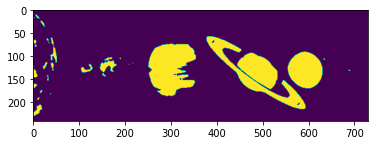

In [77]:
img = cv2.imread('solar-system.jpeg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.medianBlur(gray_img, 5)

circles = cv2.HoughCircles(gray_img, method=cv2.HOUGH_GRADIENT, dp=1, minDist=120, param1=100, param2=30, minRadius=0, maxRadius=0)

# ???
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(img, (i[0], i[1]), 2, (0, 255, 0), 3)

cv2.imwrite('planets_circle.jpeg', img)
plt.imshow(thresh)

In [72]:
cv2.Canny?
cv2.HoughLinesP?
cv2.HoughCircles?
cv2.circle?

Docstring:
circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a circle.
.   
.   The function cv::circle draws a simple or filled circle with a given center and radius.
.   @param img Image where the circle is drawn.
.   @param center Center of the circle.
.   @param radius Radius of the circle.
.   @param color Circle color.
.   @param thickness Thickness of the circle outline, if positive. Negative values, like #FILLED,
.   mean that a filled circle is to be drawn.
.   @param lineType Type of the circle boundary. See #LineTypes
.   @param shift Number of fractional bits in the coordinates of the center and in the radius value.
Type:      builtin_function_or_method
